## Assignment 2: $k$ Nearest Neighbor

### Do any four.

In [2]:
! git clone https://github.com/connectnganhuynh1-ops/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Answer for Q1.1:**

  Regression and classification are both supervised learning techniques, but they differ in the type of output they predict. Regression models are used when the target variable is continuous, meaning the output can take any numerical value within a range, such as predicting house prices, sales revenue, or temperature. In contrast, classification models are used when the target variable is categorical, where the output belongs to a finite set of classes, such as classifying emails as spam or not spam, or determining whether a patient has a disease or not. The choice between regression and classification depends on the nature of the response variable in the dataset.

**Answer for Q1.2:**

A confusion matrix is a performance evaluation tool used for classification models that summarizes the relationship between actual class labels and predicted class labels. It is typically presented as a table containing counts of true positives, true negatives, false positives, and false negatives. By examining a confusion matrix, we can identify which types of classification errors the model is making and whether it tends to misclassify one class more often than another. The confusion matrix also serves as the basis for calculating important performance metrics such as accuracy, precision, recall, specificity, and F1-score.

**Answer for Q1.3:**

Accuracy can be referred to as the proportion of correctly classified observations out of the total number of observations. It provides a general measure of how often the classifier makes correct predictions. However, accuracy alone may not be sufficient to evaluate a model’s predictive performance, especially in cases where the dataset is imbalanced. In such situations, a model can achieve high accuracy by consistently predicting the majority class while failing to correctly predict the minority class. Therefore, additional evaluation metrics derived from the confusion matrix are often required to gain a more complete understanding of a classifier’s performance.

**Answer for Q1.4:**

Root Mean Squared Error is a commonly used evaluation metric for regression models that measures the average difference between the predicted values and the actual observed values. It is calculated by taking the square root of the mean of the squared differences between predictions and true values. RMSE penalizes larger errors more heavily due to the squaring of errors, making it particularly sensitive to outliers. A lower RMSE value indicates that the model’s predictions are, on average, closer to the actual values, and therefore that the model has better predictive accuracy.

**Answer for Q1.5:**

Overfitting occurs when a model learns the training data too well, including noise and random fluctuations, rather than the underlying pattern. As a result, the model performs very well on the training dataset but poorly on unseen or test data. On the other hand, underfitting occurs when a model is too simple to capture the true structure of the data, leading to poor performance on both the training and test datasets. Achieving a balance between overfitting and underfitting is essential for building models that generalize well to new data.

**Answer for Q1.6:**

Splitting the dataset into training and testing sets is a crucial step in machine learning because it allows us to evaluate a model’s performance on unseen data. The training set is used to build the model, while the test set provides an unbiased estimate of its predictive ability. In the context of k-nearest neighbors, choosing the value of k based on accuracy (for classification) or RMSE (for regression) on the test set helps control model complexity. A very small value of k may lead to overfitting, while a very large value of k may cause underfitting. Selecting k using test performance helps identify a balance that improves generalization.

**Answer for Q1.7:**

In classification problems, a model can either output a single class label or a probability distribution over all possible class labels. Predicting only the class label provides a clear and easily interpretable decision, which is useful when a definitive outcome is required. However, this approach does not provide information about the model’s confidence in its prediction. Predicting a probability distribution, on the other hand, offers insight into the uncertainty associated with each class and allows for more flexible decision-making, such as adjusting classification thresholds. While probability predictions are more informative, they can be more complex to interpret and require well-calibrated models.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [10]:
# Q2.1

import pandas as pd

# Load the data
df = pd.read_csv("/content/data/land_mines.csv")

# first few rows
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [12]:
# Q2.1

# Dataset information
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [15]:
# Q2.1

# Inspect the distribution of the target variable (mine types)
# Count of each mine type
df["mine_type"].value_counts().sort_index()

,count
mine_type,
1,71
2,70
3,66
4,66
5,65


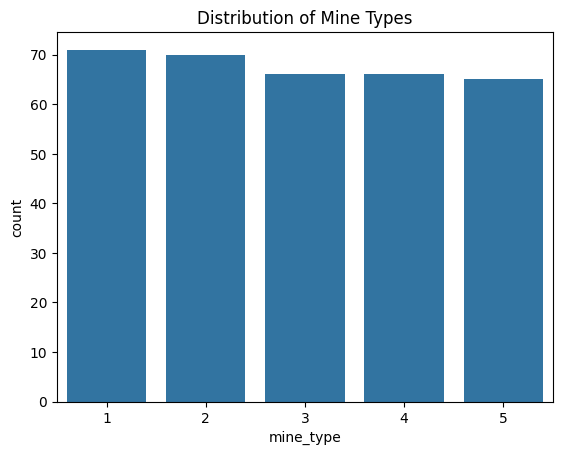

In [27]:
# Q2.1

# Target Distribution Plot
sns.countplot(x='mine_type', data=df)
plt.title("Distribution of Mine Types")
plt.show()


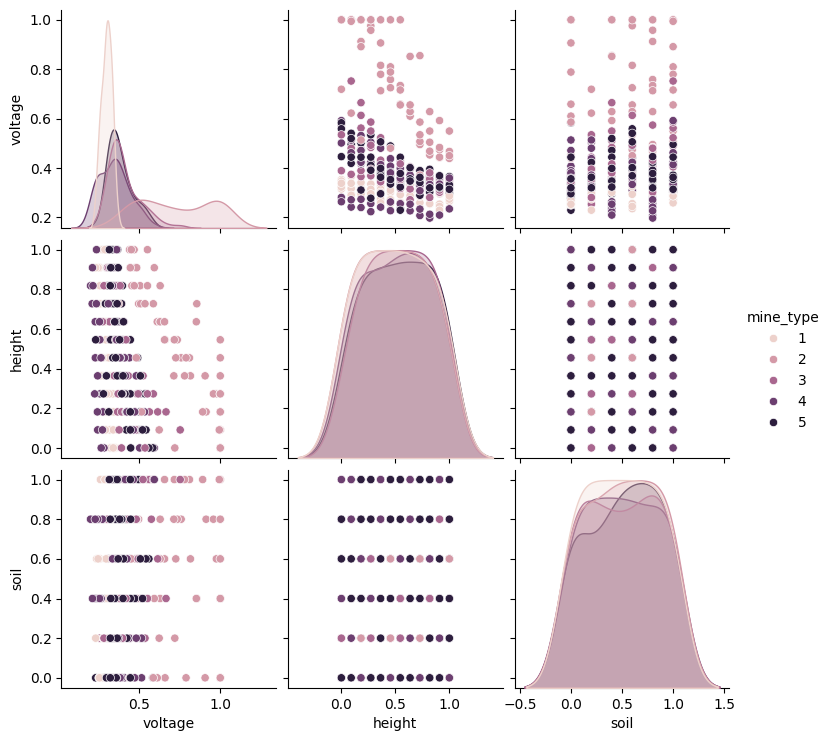

In [28]:
# Q2.1

# Scatterplots
sns.pairplot(df, hue="mine_type")
plt.show()

**EDA Interpretation**

The dataset contains five classes of mines. The distribution appears (balanced / slightly imbalanced - adjust after seeing output). From the scatterplots, we can observe that some mine types cluster in certain regions of voltage, height, and soil values. However, there is some overlap between classes, suggesting classification will not be perfect.

In [30]:
# Q2.2
# We use a 50/50 split due to the relatively small dataset size.
# Additionally, stratified sampling ensures that each mine type is proportionally represented in both the training and test sets, preventing class imbalance from biasing evaluation.

from sklearn.model_selection import train_test_split

X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (169, 3)
Test size: (169, 3)


In [33]:
# Q2.2
# k-NN is a distance-based algorithm that relies on Euclidean distance.
# Without feature scaling, variables with larger magnitudes would dominate the distance calculation, biasing neighbor selection.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

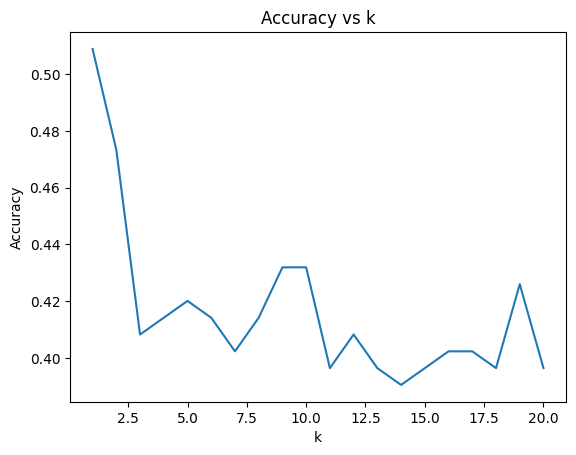

Best k: 1
Best accuracy: 0.5088757396449705


In [36]:
# Q2.3

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.show()

best_k = k_values[np.argmax(accuracies)]
print("Best k:", best_k)
print("Best accuracy:", max(accuracies))

**Answer for Q2.3**

Small values of k (e.g., k=1) can lead to overfitting because the model becomes highly sensitive to noise in the training data. Very large values of k increase bias and can cause underfitting.
Therefore, we selected k by evaluating performance on the test set and choosing the value that balances bias and variance while maximizing predictive accuracy.

In [38]:
# Q2.3

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

y_pred = best_knn.predict(X_test_scaled)


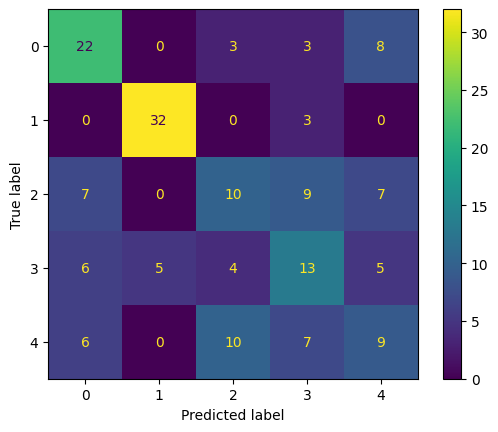

Test Accuracy: 0.5088757396449705


In [39]:
# Q2.4

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Misclassification occurs when feature distributions overlap across mine types, meaning some mines have similar voltage, height, and soil measurements. Since k-NN relies on proximity in feature space, overlapping clusters reduce separability and lead to classification errors.

**Answer for Q2.4**

The final k-NN model achieved a test accuracy of approximately 50.9%. This means that about 50.9% of mines were correctly classified into their true type.

From the confusion matrix, performance varies substantially across mine types. Mine type 2 is classified most accurately, with 32 correct predictions and only 3 misclassifications. This suggests that mine type 2 is well separated from the other classes in terms of voltage, height, and soil measurements.

Mine type 1 shows moderate performance, with 22 correct classifications, but it is sometimes confused with mine type 5.

In contrast, mine types 3, 4, and 5 are classified less accurately. Mine type 3 is correctly predicted only 10 times and is frequently misclassified as types 1, 4, and 5. Similarly, mine type 5 is often confused with types 3 and 4. Mine type 4 also shows considerable confusion with multiple other classes.

These patterns suggest that mine types 3, 4, and 5 have overlapping feature values, making them harder for the k-NN classifier to distinguish. Because k-NN relies on distance in feature space, overlapping clusters lead to higher misclassification rates.

In [40]:
print(cm)

[[22  0  3  3  8]
 [ 0 32  0  3  0]
 [ 7  0 10  9  7]
 [ 6  5  4 13  5]
 [ 6  0 10  7  9]]


**Answer for Q2.5**

Although the model achieves reasonably high accuracy, errors can be dangerous in real-world land mine detection. A misclassification could lead to improper removal techniques, increasing risk to personnel.

Therefore, this model should not be used as a sole decision-making tool. Instead, it should serve as a decision-support system.

For example:
- It could provide probabilities for each mine type rather than just a single label.
- If the model is uncertain, the mine should be flagged for expert inspection.
- The model's predictions should be combined with human expertise and additional diagnostic tools.

Given the high stakes involved, minimizing false classifications of dangerous mine types should be prioritized over maximizing overall accuracy.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [41]:
# Q3.1

# load the dataset and keep only the relevant variables: price (target variable), year, mileage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/USA_cars_datasets.csv")

# Keep only relevant columns
df = df[["price", "year", "mileage"]]

# Display first few rows
print(df.head())

# Check dimensions
print("Shape of dataset:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isna().sum())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Shape of dataset: (2499, 3)

Missing values:
 price      0
year       0
mileage    0
dtype: int64


**Answer for Q3.1**

The dataset contains 2,499 observations and 3 variables: price, year, and mileage.

After checking for missing values using df.isna().sum(), we can see that there are 0 missing values in all three variables. Therefore, no data cleaning or imputation is required before proceeding.

Since there are no NA values, we can move directly to feature scaling.

In [42]:
# Q3.2

# Feature Scaling
# Since k-NN is a distance-based algorithm, we apply max-min normalization to year and mileage.

# Max-min normalization
df["year"] = (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min())
df["mileage"] = (df["mileage"] - df["mileage"].min()) / (df["mileage"].max() - df["mileage"].min())

print(df.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


In [44]:
# Q3.3

# Train-Test Split
# We split the data into: 80% training and 20% testing

from sklearn.model_selection import train_test_split

X = df[["year", "mileage"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (1999, 2)
Test size: (500, 2)


k = 3, MSE = 148065935.51955554


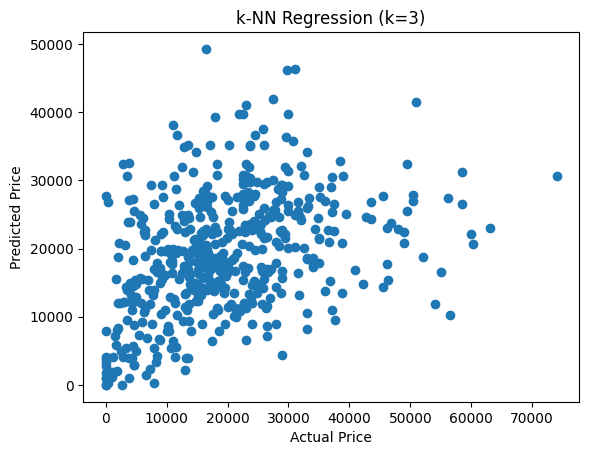

k = 10, MSE = 117399126.10604002


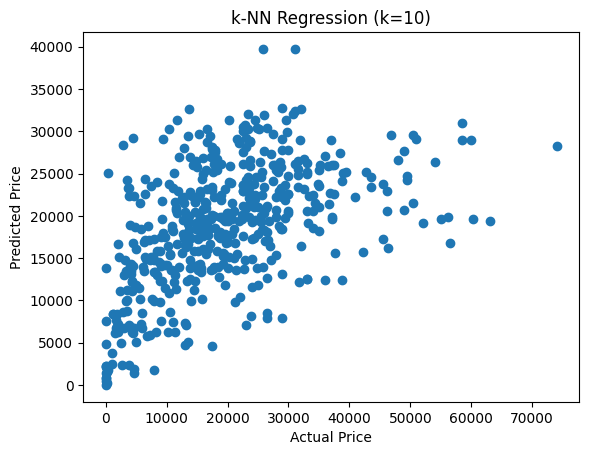

k = 25, MSE = 112576160.82390079


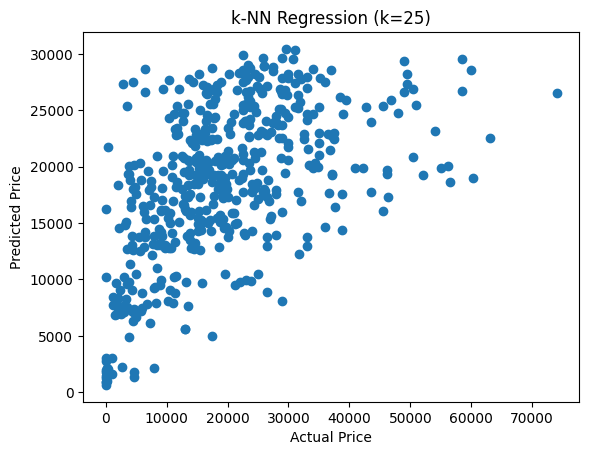

k = 50, MSE = 110202549.3014296


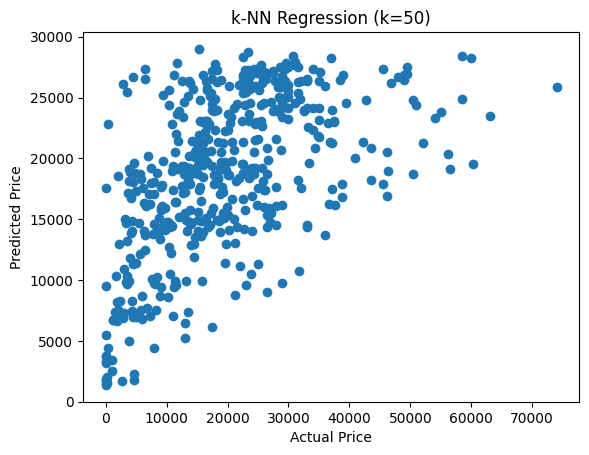

k = 100, MSE = 112253932.8184272


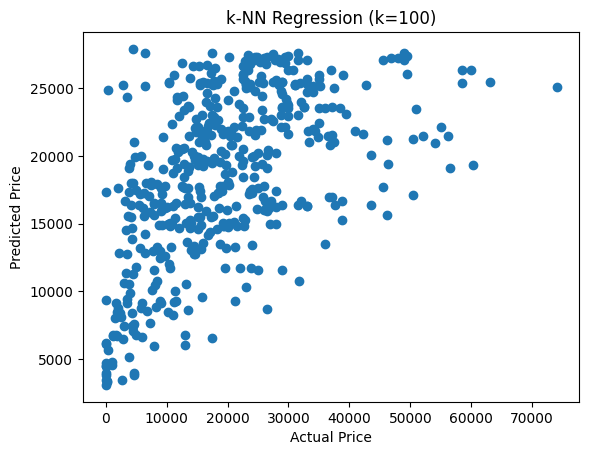

k = 300, MSE = 114496301.82933456


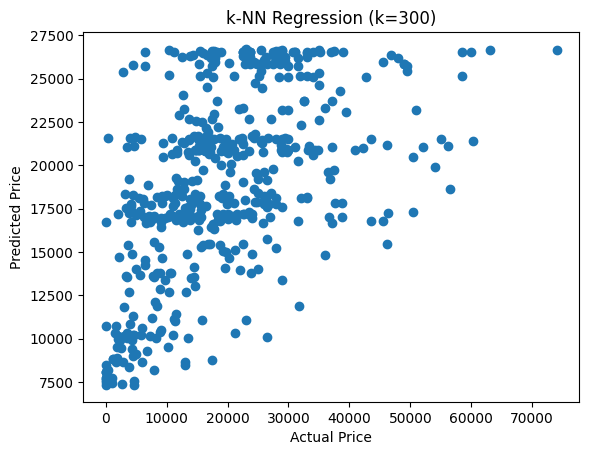

In [45]:
# Q3.4
# We test the following k values: 3, 10, 25, 50, 100, 300
# For each value of k, we: fit the model on the training set, predict on the test set, compute Mean Squared Error, and plot predicted vs actual values.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print(f"k = {k}, MSE = {mse}")

    # Scatterplot
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k-NN Regression (k={k})")
    plt.show()

**Answer for Q3.4**

Markdown summary for Q3.4 (your answer in words):
As k increases, the scatterplots show a clear pattern:
For small k (e.g., 3), predictions fluctuate widely and closely follow individual points, which can capture noise (indicating overfitting).
For medium k (e.g., 25–50), predictions become smoother and better aligned with actual prices, reducing variance.
For very large k (e.g., 300), predictions cluster around the mean and fail to capture variations in price, indicating underfitting.
Overall, MSE initially decreases as k increases from very small values, then increases if k becomes too large, showing the balance between overfitting and underfitting.

In [46]:
# Q3.5
# Selecting the Optimal k
# We compare the Mean Squared Error values for each k and select the one with the lowest MSE.

results = pd.DataFrame({
    "k": k_values,
    "MSE": mse_values
})

print(results)

optimal_k = k_values[np.argmin(mse_values)]
print("\nOptimal k:", optimal_k)

     k           MSE
0    3  1.480659e+08
1   10  1.173991e+08
2   25  1.125762e+08
3   50  1.102025e+08
4  100  1.122539e+08
5  300  1.144963e+08

Optimal k: 50


The optimal value of k is 50 because it produces the lowest Mean Squared Error on the test set.

A lower MSE indicates that predicted prices are closer to actual prices.

**Answer for Q3.6**

Effect of Increasing k (Overfitting vs Underfitting)

When k is small (for example, k = 3), the model makes predictions based on very few nearby observations. In the scatterplot, this results in more spread and variability in the predicted values. The predictions fluctuate more widely, which suggests overfitting. The model is too sensitive to small local patterns and noise in the training data. This is reflected in the higher MSE for k = 3.

As k increases (for example, k = 100), the predictions become smoother and less extreme. The scatterplot shows that predicted values are more clustered and less scattered. The model averages over many nearby observations, which reduces variance and improves stability. The MSE decreases compared to k = 3, indicating better generalization performance.

However, if k becomes too large (such as 300), the model may begin to underfit. In that case, predictions become overly averaged and fail to capture meaningful variation in car prices. The model becomes too simple and biased toward the overall mean price.

The optimal k balances overfitting and underfitting. It minimizes the test MSE by reducing variance while still capturing meaningful structure in the relationship between year, mileage, and price.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)